In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

39.03707521523344 26.4454199980959
-70.7364467405279 43.664642924131414
-45.7262393426797 -151.5592168376591
-38.704693057681666 -119.10612009283062
-19.952990119328575 -27.569650234567945
33.97398485757405 -179.71128979072
3.9291030992084757 -37.848689354459395
31.181207292458495 -50.57389837990908
53.64625838184915 -121.47614484241963
81.90252466178148 165.74670978046277
80.12139104180687 57.3016221706452
28.042076337392928 -127.57599733282589
41.96622025538548 -162.73555346684915
10.875241165803672 163.96262025198092
58.555339959337886 124.64689078406712
-19.95494532019235 8.482035505850234
56.1022766527081 31.14988127655161
29.596255094029544 -94.82688195090618
57.77354603408071 -12.61981629016256
10.131403662860947 12.842727839352307
-3.34723177096906 -80.54520611819704
-48.00518137403801 52.70599378081991
-80.51943541828066 91.58174048242137
-81.02976908015212 -179.04959356470408
0.25403683968349355 -128.82785638494573
69.37695635383383 -0.23370699532401318
-23.33986310039336 49.

-63.833074258096445 141.61763984491978
-5.719565735875165 65.76925950560602
16.734301628922708 -80.06807546945713
38.28723296822179 77.71748250396473
23.508225255371087 113.6945727130302
12.189801504765455 -128.8472929361727
80.00756988920423 -45.698948644696856
63.11987741816108 -5.646740989167398
78.28118309885451 49.551119904103615
30.898108913909653 156.08722078939252
15.271937183516172 63.69385525134561
-86.36622126354914 -102.5158139885678
58.724550590928544 -85.4760690194039
-80.77061641613186 160.28938794821346
41.63405054819333 -113.44594920014217
20.942218888673153 -38.58100724803086
-61.2833872438257 -43.85102437486182
-43.829383544955135 53.535606012070815
-31.38578331441405 155.9195408912704
-41.27447502246156 -33.59709226950238
-36.38725039849421 45.31655507343589
-68.82664446454115 -80.76557245981796
-36.12561584467603 163.30503544712644
29.531361262514622 54.79838031528507
-42.681897952060346 -118.31164638084871
88.11943268936889 -117.37193196730966
-79.41361872633802 -

-28.325875607766122 168.42673215634863
-3.647460009451436 69.16361234789125
-9.124791655183813 -47.62506861487958
78.82562103761387 120.17470415060194
52.43919694480627 142.33575590706283
-51.94044819624634 -132.0082693333854
-49.010171448783424 -138.76724791468888
16.826626728077414 -140.43352365947405
-4.4767223292991645 -67.12549469272089
3.851562903652038 95.48472371160375
41.66104501066917 -155.05635391303275
-40.21693572155159 87.97432631103806
-64.50409555443755 -81.14481299099747
-20.57493229745107 -39.51094398033746
-67.28733752497442 136.71924166626968
-80.38853528341401 -19.2009854437145
-60.177083808144076 -167.87213921298832
86.89033153079674 10.421766479110772
64.83262971969697 20.284481047887994
-30.71293119875792 -162.83074587073014
78.11124679498334 44.64351679087619
25.66460290980757 -108.54085712185157
3.2342294527687443 131.40276620262347
82.47594603290523 -55.919432410043356
43.71054958011831 -135.06245220534177
60.522229413980114 -153.39555740453042
50.13477689913

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [9]:
# 6.2.6: Get the City Weather Data
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1



# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | skopelos
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | caravelas
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | itarema
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | quesnel
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | lompoc
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | aldan
Processing Record 16 of Set 1 | opuwo
Processing Record 17 of Set 1 | kunya
Processing Record 18 of Set 1 | seabrook
Processing Record 19 of Set 1 | ballina
Processing Record 20 of Set 1 | mubi
Processing Record 21 of Set 1 | tumbes
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
Proce

City not found. Skipping...
Processing Record 40 of Set 4 | ouegoa
Processing Record 41 of Set 4 | orlik
Processing Record 42 of Set 4 | mamaku
Processing Record 43 of Set 4 | zapolyarnyy
Processing Record 44 of Set 4 | husavik
Processing Record 45 of Set 4 | brigantine
Processing Record 46 of Set 4 | kruisfontein
Processing Record 47 of Set 4 | zhigalovo
Processing Record 48 of Set 4 | chapais
Processing Record 49 of Set 4 | norman wells
Processing Record 50 of Set 4 | burica
City not found. Skipping...
Processing Record 1 of Set 5 | taoudenni
Processing Record 2 of Set 5 | tazovskiy
Processing Record 3 of Set 5 | gulshat
City not found. Skipping...
Processing Record 4 of Set 5 | geraldton
Processing Record 5 of Set 5 | hobyo
Processing Record 6 of Set 5 | praia
Processing Record 7 of Set 5 | esperance
Processing Record 8 of Set 5 | arlit
Processing Record 9 of Set 5 | kamenka
Processing Record 10 of Set 5 | lagoa
Processing Record 11 of Set 5 | salina cruz
Processing Record 12 of Set

Processing Record 28 of Set 8 | warqla
City not found. Skipping...
Processing Record 29 of Set 8 | fort william
Processing Record 30 of Set 8 | kiyasovo
Processing Record 31 of Set 8 | lumphat
Processing Record 32 of Set 8 | forfar
Processing Record 33 of Set 8 | xining
Processing Record 34 of Set 8 | poum
Processing Record 35 of Set 8 | guisa
Processing Record 36 of Set 8 | ijaki
City not found. Skipping...
Processing Record 37 of Set 8 | berikulskiy
City not found. Skipping...
Processing Record 38 of Set 8 | maxixe
Processing Record 39 of Set 8 | progreso
Processing Record 40 of Set 8 | umm durman
City not found. Skipping...
Processing Record 41 of Set 8 | hamilton
Processing Record 42 of Set 8 | sioux lookout
Processing Record 43 of Set 8 | negele
City not found. Skipping...
Processing Record 44 of Set 8 | atocha
Processing Record 45 of Set 8 | oxapampa
Processing Record 46 of Set 8 | bereznik
Processing Record 47 of Set 8 | biltine
Processing Record 48 of Set 8 | hopelchen
Processi

Processing Record 14 of Set 12 | abu samrah
Processing Record 15 of Set 12 | port augusta
Processing Record 16 of Set 12 | kichmengskiy gorodok
Processing Record 17 of Set 12 | yar-sale
Processing Record 18 of Set 12 | gat
Processing Record 19 of Set 12 | sorvag
City not found. Skipping...
Processing Record 20 of Set 12 | newton
Processing Record 21 of Set 12 | ust-maya
Processing Record 22 of Set 12 | puerto madero
Processing Record 23 of Set 12 | sun prairie
Processing Record 24 of Set 12 | mumford
Processing Record 25 of Set 12 | puerto madryn
Processing Record 26 of Set 12 | tungor
Processing Record 27 of Set 12 | sumkino
Processing Record 28 of Set 12 | rock sound
Processing Record 29 of Set 12 | anshun
Processing Record 30 of Set 12 | deputatskiy
Processing Record 31 of Set 12 | knysna
Processing Record 32 of Set 12 | trebinje
Processing Record 33 of Set 12 | tilichiki
Processing Record 34 of Set 12 | dundee
Processing Record 35 of Set 12 | yining
Processing Record 36 of Set 12 |

In [14]:
# 6.2.7: Create a DataFrame of City Weather Data
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Skopelos,39.1247,23.7247,81.21,70,1,3.87,GR,2022-06-05 21:37:18
1,Port Alfred,-33.5906,26.8910,57.18,89,10,15.82,ZA,2022-06-05 21:37:18
2,Mataura,-46.1927,168.8643,45.03,83,0,3.20,NZ,2022-06-05 21:37:18
3,Rikitea,-23.1203,-134.9692,73.69,78,16,17.56,PF,2022-06-05 21:37:19
4,Caravelas,-17.7125,-39.2481,69.31,72,68,9.06,BR,2022-06-05 21:37:19
5,Kapaa,22.0752,-159.3190,79.48,74,100,10.36,US,2022-06-05 21:37:20
6,Itarema,-2.9248,-39.9167,77.16,85,29,11.01,BR,2022-06-05 21:37:20
7,Saint George,37.1041,-113.5841,98.64,14,0,8.05,US,2022-06-05 21:37:20
8,Quesnel,52.9999,-122.5029,61.30,72,75,9.22,CA,2022-06-05 21:37:21
9,Pevek,69.7008,170.3133,32.68,81,49,7.02,RU,2022-06-05 21:37:21


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Skopelos,GR,2022-06-05 21:37:18,39.1247,23.7247,81.21,70,1,3.87
1,Port Alfred,ZA,2022-06-05 21:37:18,-33.5906,26.8910,57.18,89,10,15.82
2,Mataura,NZ,2022-06-05 21:37:18,-46.1927,168.8643,45.03,83,0,3.20
3,Rikitea,PF,2022-06-05 21:37:19,-23.1203,-134.9692,73.69,78,16,17.56
4,Caravelas,BR,2022-06-05 21:37:19,-17.7125,-39.2481,69.31,72,68,9.06
...,...,...,...,...,...,...,...,...,...
548,Skelleftea,SE,2022-06-05 21:41:01,64.7507,20.9528,46.99,52,7,8.05
549,La Trinidad,PH,2022-06-05 21:41:01,16.4550,120.5875,61.81,86,69,3.65
550,Sorong,ID,2022-06-05 21:41:01,-0.8833,131.2500,77.97,82,56,5.48
551,Homer,US,2022-06-05 21:41:02,59.6425,-151.5483,67.05,55,40,11.50


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# 6.3.1: Plot Latitude vs. Temperature
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

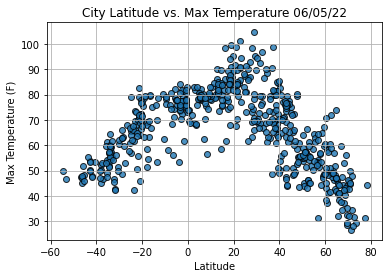

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [ ]:
# 6.3.2: Plot Latitude vs. Humidity
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()